In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
cd C:\Users\AMBIKA\Desktop\Simplilearn\1568699544_comcast_telecom_complaints_data

C:\Users\AMBIKA\Desktop\Simplilearn\1568699544_comcast_telecom_complaints_data


In [3]:
ctcd=pd.read_csv('Comcast_telecom_complaints_data.csv')

In [4]:
ctcd.head(2)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No


In [5]:
ctcd['Date_month_year']=ctcd['Date_month_year'].astype(str)
ctcd['Time']=ctcd['Time'].astype(str)
ctcd['month']=""

ctcd['day']=""

In [6]:
l=len(ctcd['month'])

In [7]:
#Getting month and day column
for i in range(0,l):
    
    ctcd.loc[i,'Date_month_year']=datetime.strptime(ctcd['Date_month_year'][i],"%d-%b-%y")
    ctcd.loc[i,'month']=ctcd['Date_month_year'][i].month
    ctcd.loc[i,'day']=ctcd['Date_month_year'][i].day
    

In [8]:
# Getting Freq of complaints on daily basis
    
day_plot=ctcd['day'].value_counts()


In [9]:
#creating Dataframe of Complaints on daily basis
day_plot1=pd.DataFrame({'Day':day_plot.index,'Freq':day_plot.values})
day_plot1.sort_values(by='Day',inplace=True)


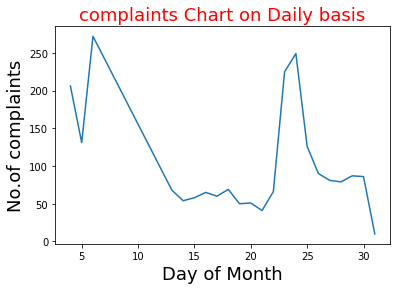

In [10]:
#plotting line graph
x=day_plot1['Day']
y=day_plot1['Freq']
plt.plot(x,y)
plt.title('complaints Chart on Daily basis',fontsize=18,color='Red')
plt.xlabel('Day of Month',fontsize=18)
plt.ylabel('No.of complaints',fontsize=18)
plt.show()

In [11]:
# Getting Freq of complaints on monthly basis
mon_plot=ctcd['month'].value_counts()

In [12]:
#creating Dataframe of Complaints on monthly basis
df=pd.DataFrame({'Month':mon_plot.index,'Freq':mon_plot.values})

df.sort_values(by='Month',inplace=True)
df['Month']=df['Month'].astype(str)

In [13]:
#converting number to alphebtical of months
l1=len(df['Month'])
for i in range(0,l1):
    #print(ctcd['month'][i])
    #ctcd['month'][i]=ctcd['month'][i].astype(str)
    df.loc[i,'Month']=datetime.strptime(df['Month'][i],"%m")
    df.loc[i,'Month']=df['Month'][i].strftime("%b")
    

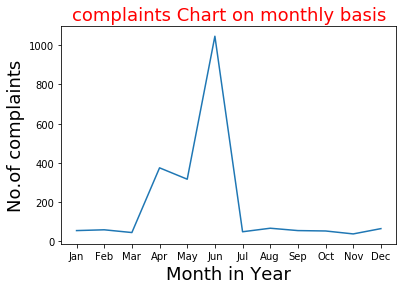

In [14]:
#plotting line graph for monthly basis
x=df['Month']
y=df['Freq']
plt.plot(x, y)
plt.title('complaints Chart on monthly basis',fontsize=18,color='red')
plt.xlabel('Month in Year',fontsize=18)
plt.ylabel('No.of complaints',fontsize=18)

plt.show()

In [15]:
#Frequecy of complaint types

fct=ctcd['Customer Complaint'].value_counts()
fct1=pd.DataFrame({'Customer Complaint Type':fct.index,'Freq':fct.values})
print(fct1)

                                Customer Complaint Type  Freq
0                                               Comcast    83
1                                      Comcast Internet    18
2                                      Comcast Data Cap    17
3                                               comcast    13
4                                     Comcast Data Caps    11
5                                             Data Caps    11
6                                       Comcast Billing    11
7                              Unfair Billing Practices     9
8                                        Internet speed     8
9                                      Comcast internet     8
10                                     Comcast data cap     8
11                                    Comcast data caps     8
12                                      Comcast/Xfinity     8
13                                             Data Cap     8
14                                              COMCAST     6
15      

In [16]:
#creating categorical variable with value as Open and Closed.
ctcd['cv']=ctcd['Status']
status_mapping={'Open':'Open','Pending':'Open','Closed':'Closed','Solved':'Closed'}
ctcd['cv']=ctcd['cv'].map(status_mapping)

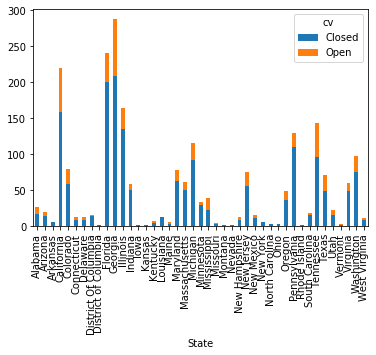

In [17]:
#state wise status of complaints in a stacked bar chart
cs = pd.crosstab(index=ctcd['State'], columns=ctcd['cv'])
#print(cs)
cs.plot(kind='bar', stacked=True)

In [18]:
#Retrievieng th state that has the maximum complaints
cs['tc']=cs['Closed']+cs['Open']
print(cs['tc'].idxmax())

Georgia


In [19]:
#Retrievieng th state that has the highest percentage of unresolved complaints
cs['URP']=((cs['Open'])/cs['tc'])*100
#print(cs)
print(cs['URP'].idxmax())


Kansas


In [20]:
#the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
cs1 = pd.crosstab(index=ctcd['Received Via'], columns=ctcd['cv'])

cs1['tc']=cs1['Closed']+cs1['Open']
cs1['RP']=((cs1['Closed'])/cs1['tc'])*100
print(cs1['RP'])

Received Via
Customer Care Call    77.211796
Internet              76.289593
Name: RP, dtype: float64
